<a href="https://colab.research.google.com/github/mansh2060/fraud-detection/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Fraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
192588,13,CASH_IN,408313.37,C437943627,3441357.55,3849670.91,C1970559605,694470.70,286157.33,0.0,0.0
192589,13,CASH_IN,132941.53,C248425845,3849670.91,3982612.44,C1721892488,2565275.25,2432333.72,0.0,0.0
192590,13,CASH_IN,189213.75,C960327564,3982612.44,4171826.19,C1495001462,4851384.58,5424905.46,0.0,0.0
192591,13,CASH_IN,154029.98,C1300187685,4171826.19,4325856.17,C729214165,1211596.13,1057566.15,0.0,0.0
192592,13,CASH_IN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192593 entries, 0 to 192592
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            192593 non-null  int64  
 1   type            192593 non-null  object 
 2   amount          192593 non-null  float64
 3   nameOrig        192592 non-null  object 
 4   oldbalanceOrg   192592 non-null  float64
 5   newbalanceOrig  192592 non-null  float64
 6   nameDest        192592 non-null  object 
 7   oldbalanceDest  192592 non-null  float64
 8   newbalanceDest  192592 non-null  float64
 9   isFraud         192592 non-null  float64
 10  isFlaggedFraud  192592 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 16.2+ MB


In [6]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [7]:
for column in df:
   if df[column].isnull().sum()==1 and df[column].dtype==object:
      df[column]=df[column].fillna('default')
   if df[column].isnull().sum()==1 and df[column].dtype==float:
      df[column]=df[column].fillna(df[column].mode()[0])

In [8]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192593 entries, 0 to 192592
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            192593 non-null  int64  
 1   type            192593 non-null  object 
 2   amount          192593 non-null  float64
 3   nameOrig        192593 non-null  object 
 4   oldbalanceOrg   192593 non-null  float64
 5   newbalanceOrig  192593 non-null  float64
 6   nameDest        192593 non-null  object 
 7   oldbalanceDest  192593 non-null  float64
 8   newbalanceDest  192593 non-null  float64
 9   isFraud         192593 non-null  float64
 10  isFlaggedFraud  192593 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 16.2+ MB


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
192588,13,CASH_IN,408313.37,C437943627,3441357.55,3849670.91,C1970559605,694470.70,286157.33,0.0,0.0
192589,13,CASH_IN,132941.53,C248425845,3849670.91,3982612.44,C1721892488,2565275.25,2432333.72,0.0,0.0
192590,13,CASH_IN,189213.75,C960327564,3982612.44,4171826.19,C1495001462,4851384.58,5424905.46,0.0,0.0
192591,13,CASH_IN,154029.98,C1300187685,4171826.19,4325856.17,C729214165,1211596.13,1057566.15,0.0,0.0
192592,13,CASH_IN,2.00,default,0.00,0.00,default,0.00,0.00,0.0,0.0


In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,192593.000000,1.925930e+05,1.925930e+05,1.925930e+05,1.925930e+05,1.925930e+05,192593.000000,192593.0
mean,9.953046,1.808083e+05,8.856587e+05,9.035158e+05,9.373809e+05,1.192423e+06,0.000742,0.0
std,2.081126,3.308757e+05,2.781975e+06,2.819395e+06,2.371162e+06,2.661274e+06,0.027239,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.192803e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.795119e+04,1.945500e+04,0.000000e+00,4.976800e+04,1.288272e+05,0.000000,0.0
75%,11.000000,2.286971e+05,1.929087e+05,2.282307e+05,7.564417e+05,1.186557e+06,0.000000,0.0
max,13.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


Text(0.5, 1.0, 'Distribution of Fraudelent Transactions')

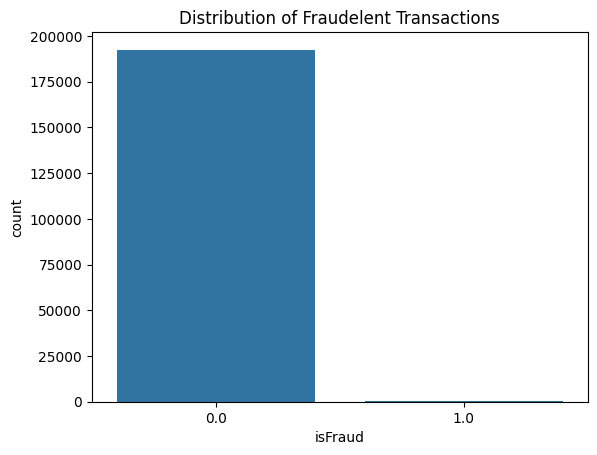

In [12]:
sns.countplot(x='isFraud',data=df)
plt.title('Distribution of Fraudelent Transactions')


Text(0.5, 1.0, 'Amount vs Fraud')

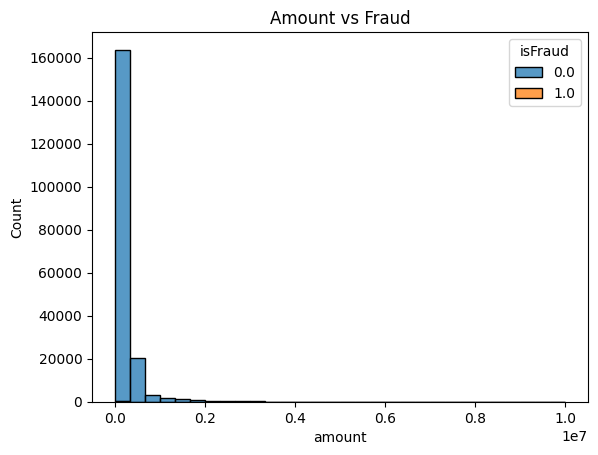

In [13]:
sns.histplot(data=df,x='amount',hue='isFraud',multiple='stack',bins=30)
plt.title("Amount vs Fraud")

Text(0.5, 1.0, 'Amount VS Fraud')

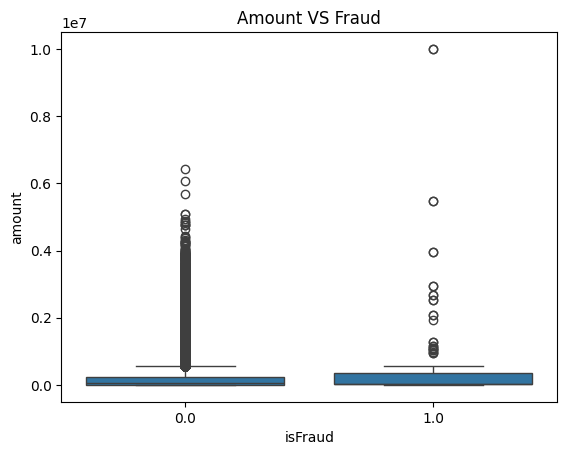

In [14]:
sns.boxplot(data=df,x='isFraud',y='amount')
plt.title('Amount VS Fraud')

In [15]:
columns=df.columns.tolist()
columns.insert(-2,columns.pop(-11))
df=df[columns]
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,step,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,1,0.0,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,1,0.0,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1.0,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1.0,0.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,1,0.0,0.0


Text(0.5, 1.0, 'Correlation_matrix')

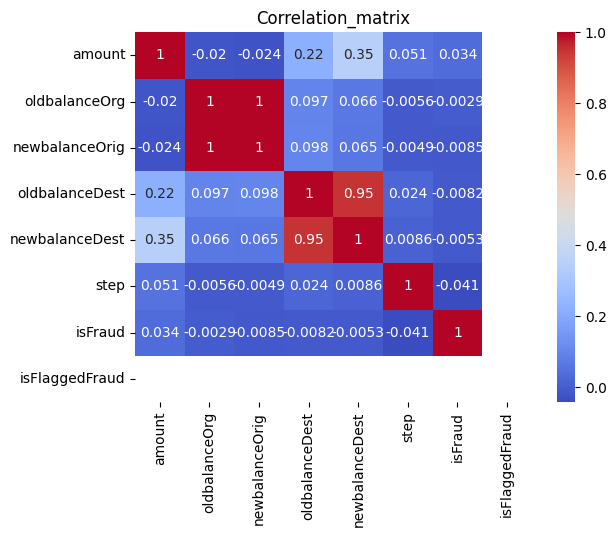

In [16]:
num_columns=[]
for column in df:
  if df[column].dtype!=object:
    num_columns.append(column)
correlation_matrix=df[num_columns].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation_matrix')

In [17]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label_encoder=LabelEncoder()
for column in df:
  if df[column].dtype==object:
    df[column]=label_encoder.fit_transform(df[column])
    print(df[column])



0         3
1         3
2         4
3         1
4         3
         ..
192588    0
192589    0
192590    0
192591    0
192592    0
Name: type, Length: 192593, dtype: int64
0          22926
1          66003
2          30224
3         176600
4         103732
           ...  
192588    135943
192589    117037
192590    188574
192591     29707
192592    192589
Name: nameOrig, Length: 192593, dtype: int64
0         56790
1         59134
2         15996
3         14224
4         29133
          ...  
192588    10446
192589     7723
192590     5339
192591    17847
192592    91743
Name: nameDest, Length: 192593, dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192593 entries, 0 to 192592
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            192593 non-null  int64  
 1   amount          192593 non-null  float64
 2   nameOrig        192593 non-null  int64  
 3   oldbalanceOrg   192593 non-null  float64
 4   newbalanceOrig  192593 non-null  float64
 5   nameDest        192593 non-null  int64  
 6   oldbalanceDest  192593 non-null  float64
 7   newbalanceDest  192593 non-null  float64
 8   step            192593 non-null  int64  
 9   isFraud         192593 non-null  float64
 10  isFlaggedFraud  192593 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 16.2 MB


In [19]:
x=df.drop(['nameOrig','nameDest','isFlaggedFraud','isFraud'],axis=1)
y=df['isFraud']

In [20]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step
0,3,9839.64,170136.0,160296.36,0.0,0.0,1
1,3,1864.28,21249.0,19384.72,0.0,0.0,1
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,1


In [21]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
x_test=scaling.transform(x_test)


In [34]:
X_train

array([[ 1.63945173,  1.17237028, -0.31962205, ...,  0.79777975,
         1.84036804, -0.45721594],
       [ 1.63945173,  0.59186241, -0.31962205, ..., -0.04004957,
         0.35482602,  0.02319521],
       [ 0.89842459, -0.47854044, -0.31962205, ..., -0.39696924,
        -0.4497664 ,  0.9840175 ],
       ...,
       [-0.5836297 ,  0.19841492, -0.31067801, ..., -0.28974258,
        -0.24071913,  0.50360635],
       [-0.5836297 ,  0.65656355, -0.28340946, ..., -0.39696924,
        -0.30006276,  0.9840175 ],
       [ 0.89842459, -0.51616556, -0.31962205, ..., -0.39696924,
        -0.4497664 ,  0.50360635]])

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)


LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [25]:
y_pred=logistic_regression.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9993769308652872


<Axes: >

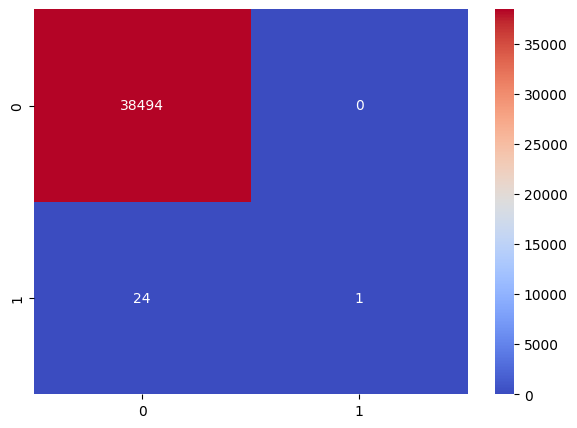

In [26]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',fmt='d')


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9993250084373946


Text(0.5, 1.0, 'KNN Confusion Matrix')

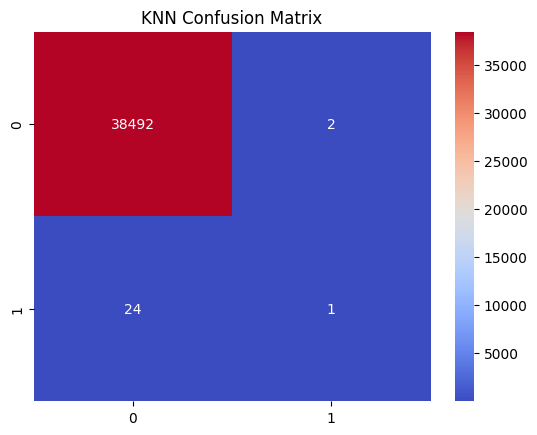

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',fmt='d')
plt.title('KNN Confusion Matrix')

In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)


DecisionTreeClassifier()

In [30]:
y_pred=decision_tree.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9991173187258237


Text(0.5, 1.0, 'Decision tree confusion matrix')

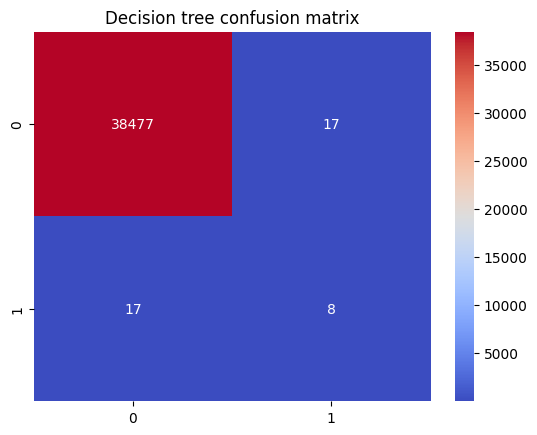

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm',fmt='d')
plt.title('Decision tree confusion matrix')

In [35]:
type_=int(input("Enter type                         :"))
amount=float(input("Enter amount                    :"))
oldbalanceOrg=float(input("Enter oldbalanceorg      :"))
newbalanceOrig=float(input("Enter newbalanceOrig    :"))
oldbalanceDest=float(input("Enter oldbalanceDest    :"))
newbalanceDest=float(input("Enter newbalanceDest    :"))
step=int(input("Enter steps                         :"))

Enter type                         :1
Enter amount                    :12585.65
Enter oldbalanceorg      :185256.56
Enter newbalanceOrig    :65895.63
Enter oldbalanceDest    :78569.365
Enter newbalanceDest    :12568.63
Enter steps                         :1


In [41]:
value_array=np.array([[type_,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step]])

In [42]:
prediction=knn.predict(value_array)
if prediction==1:
  print("Fraud!!")
else:
  print("No Fraud!!")

No Fraud!!
